In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(cowplot))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(Ipaper))
suppressMessages(library(colorRamp2))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(ggplot2))
suppressMessages(library(ggrepel))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject_T", showLogo = FALSE)

Successfully loaded ArchRProject!



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2088de30790055-Date-2025-03-18_Time-02-15-37.438268.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2088de30790055-Date-2025-03-18_Time-02-15-37.438268.log



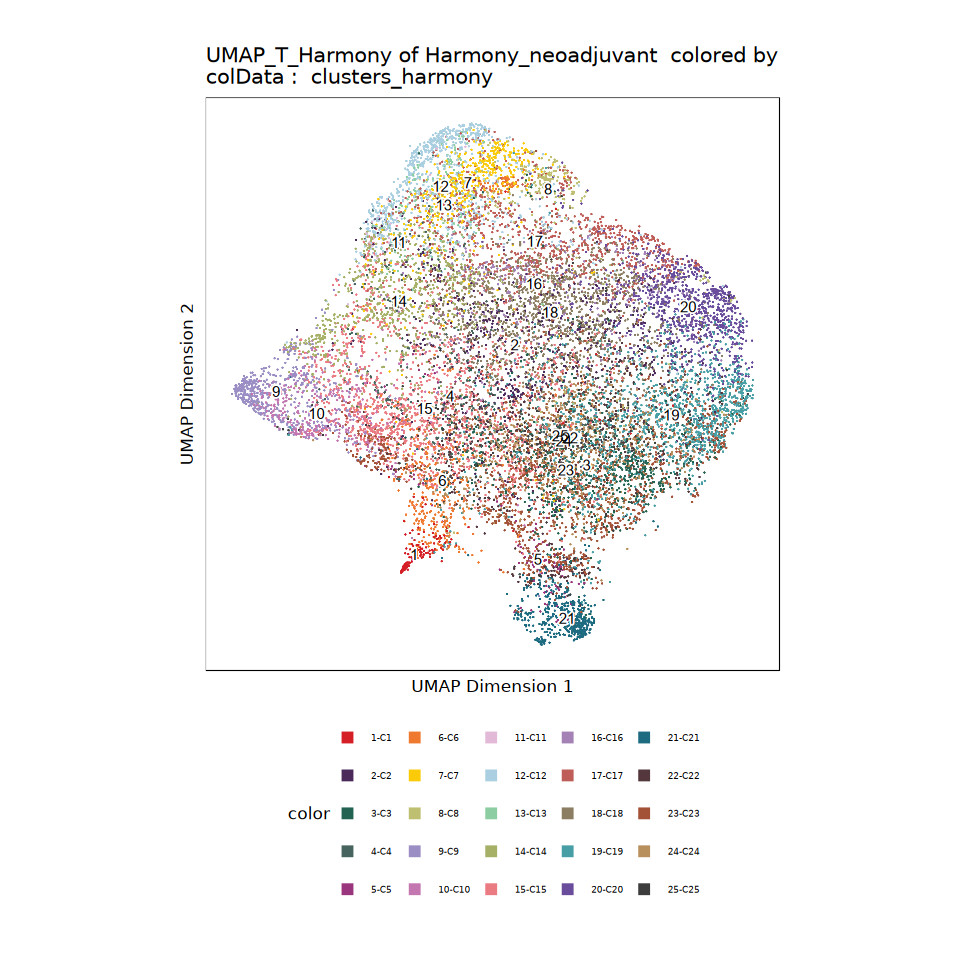

In [4]:
options(repr.plot.height = 8, repr.plot.width = 8)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "clusters_harmony", 
    embedding = "UMAP_T_Harmony"
    )
p1

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2088de54c6845d-Date-2025-03-18_Time-02-15-43.574048.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2088de54c6845d-Date-2025-03-18_Time-02-15-43.574048.log



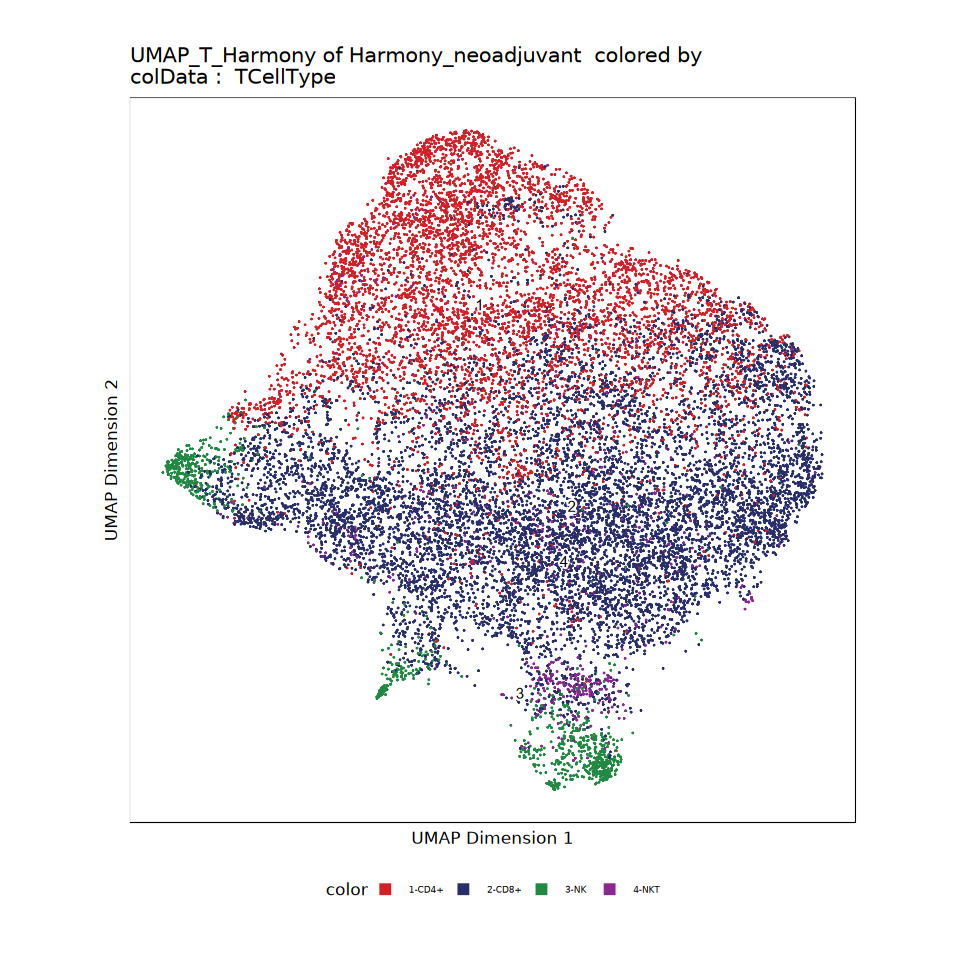

In [5]:
options(repr.plot.height = 8, repr.plot.width = 8)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "TCellType", 
    embedding = "UMAP_T_Harmony"
    )
p1

In [6]:
markersGS <- readRDS(file = "./ArchRProject_T/markersGS.rds")

In [ ]:
# markersGS <- getMarkerFeatures(
#     ArchRProj = proj,
#     useMatrix = "GeneScoreMatrix",
#     groupBy = "TCellType",
#     bias = c("TSSEnrichment", "log10(nFrags)"),
#     testMethod = "wilcoxon"
#     )

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1f09f6d204e1c-Date-2025-03-17_Time-09-31-24.393209.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Double.Matrix

2025-03-17 09:31:24.801833 : Matching Known Biases, 0.006 mins elapsed.

###########
2025-03-17 09:34:19.628091 : Completed Pairwise Tests, 2.919 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-1f09f6d204e1c-Date-2025-03-17_Time-09-31-24.393209.log



In [6]:
saveRDS(markersGS, file = "./ArchRProject_T/markersGS_TCellType.rds")

ERROR: Error: object 'markersGS' not found


In [4]:
new_order <- c(
    "CD4+", "CD8+"
)

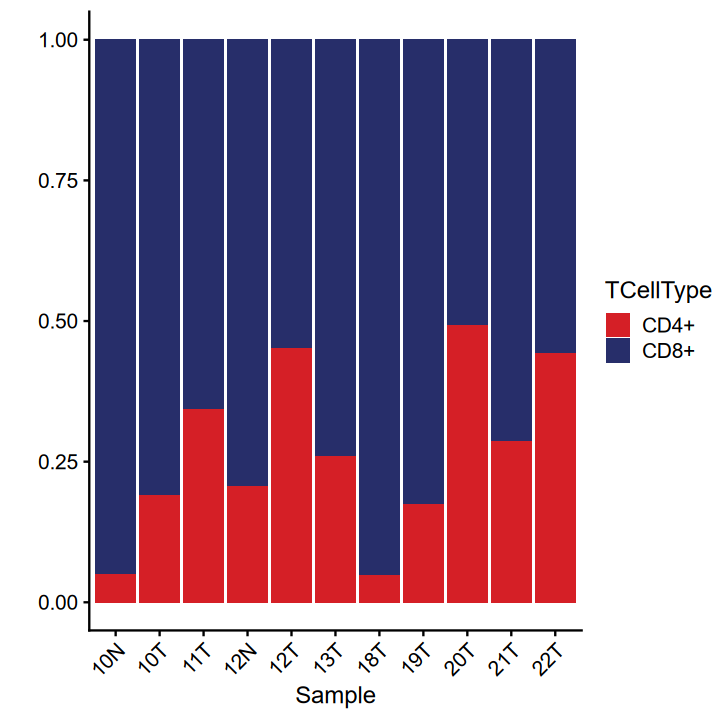

In [5]:
# 计算各样本中细胞类型的比例
sample_cell_type_distribution <- table(proj$Sample, proj$TCellType)
sample_cell_type_distribution <- prop.table(sample_cell_type_distribution, 1)

# 转换为数据框
df_sample <- as.data.frame(sample_cell_type_distribution)
df_sample$Var2 <- factor(df_sample$Var2, levels = new_order)
cols <- ArchR::paletteDiscrete(df_sample$Var2)

# 创建堆叠图
p <- ggplot(df_sample, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = cols) +
  theme_cowplot() +
  xlab("Sample") +
  ylab("") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(fill = "TCellType")

options(repr.plot.width = 6, repr.plot.height = 6)
# ggsave("/data/hanxue/BCY_ATAC/joint_output/Sample-CellType-Distribution.svg",plot = p, width = 6, height = 6, device = "svg")
p

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-1f09f67a700c3f-Date-2025-03-17_Time-09-34-30.175348.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

CD4+:

	DIRAS3, WLS, MIR1262, HSD11B1-AS1, PNLIP, SLC18A2, FANK1-AS1, CARD17, C11orf88, PATE2, TAS2R43, TAC3, MIR208B, LINC00640, SLC5A11

CD8+:

	SLAMF8, CRTAM, STYK1, MIR548AR, LINC01054, CCL3, CCL3L1, CCL4L1, TBC1D3B, CCL3L3, CCL4L2, CD8A, CD8B, LINC01564, MIR200A

NK:

	MIR200A, MIR429, FCN3, DMRTA2, PLPP3, LOC101929935, LINC01360, ERICH3, ERICH3-AS1, NEXN-AS1, CYR61, TBX15, LINC00622, ZNF697, PDZK1

NKT:

	S100A14, FAM170B, MS4A5, MS4A1, KLRD1, LOC101928100, KLRK1, KLRC4-KLRK1, KLRC4, KLRC3, KLRC1, LOC100506691, PROX2, TMIGD2, FSD1

Identified 560 markers!



 [1] "CD3D"   "CD3E"   "CD4"    "CD8A"   "CD8B"   "CCR7"   "IL7R"   "ITGAE" 
 [9] "IFNG"   "FOXP3"  "CTLA4"  "GATA3"  "RORC"   "BCL6"   "CD45RO" "PDCD1" 
[17] "CD200"  "NCAM1"  "NKG7"   "FGFBP2"


Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-1f09f67a700c3f-Date-2025-03-17_Time-09-34-30.175348.log



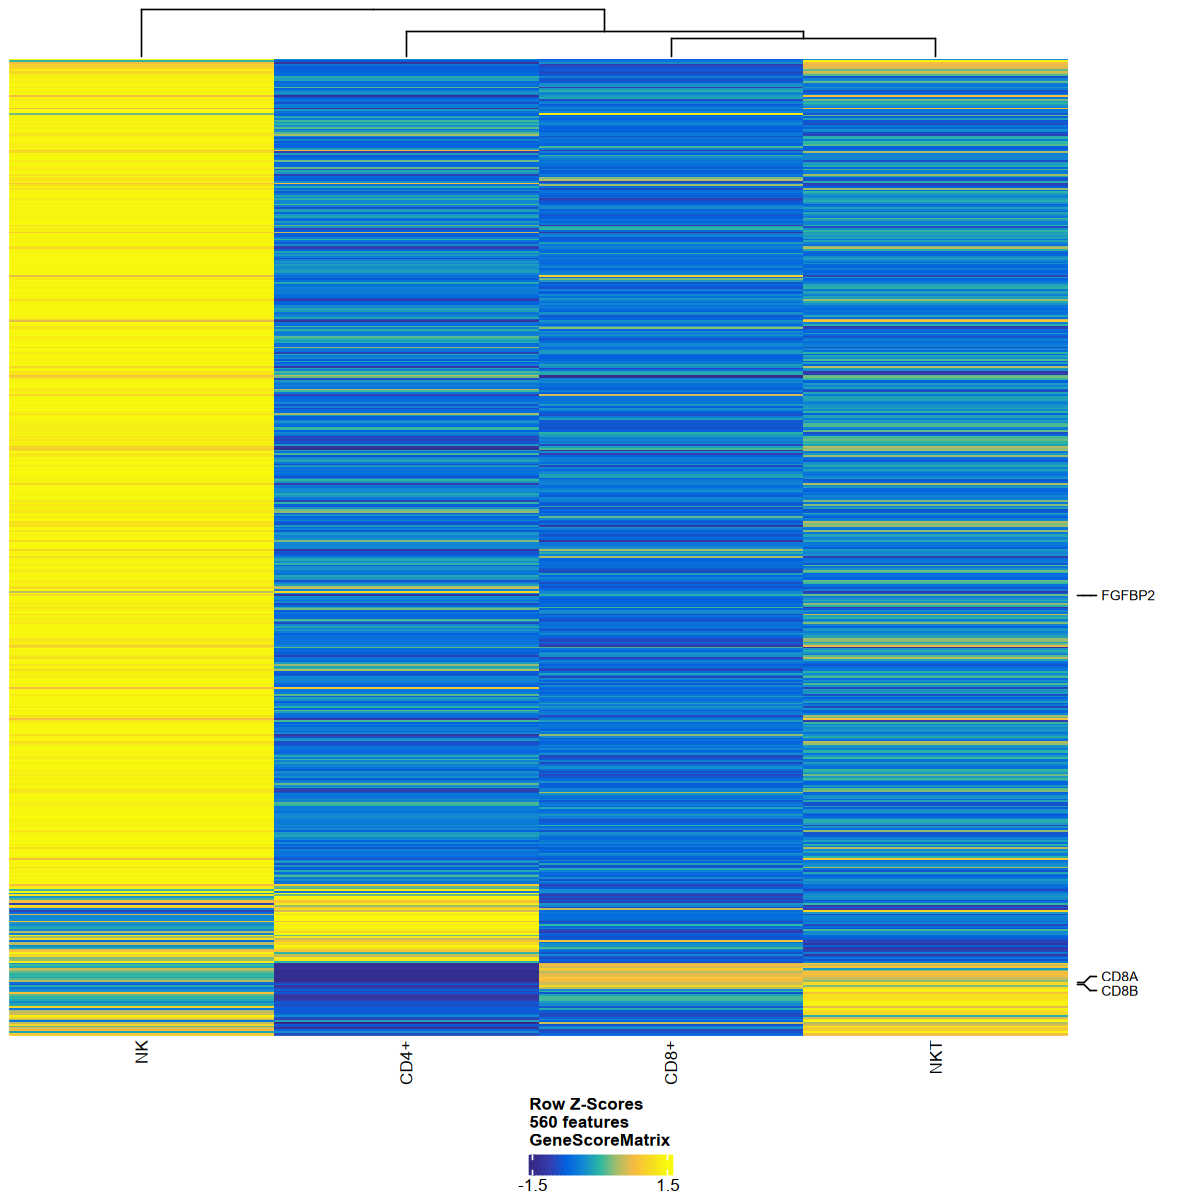

In [9]:
markerGenes <- c(
    "CD3D", "CD3E", #T细胞标志marker
    "CD4", # CD4+标志marker
    "CD8A", "CD8B", # CD8+标志marker
    "CCR7", "IL7R", "ITGAE", "IFNG", # CD4+ CD8+ 共同亚群
    "FOXP3", "CTLA4",  "GATA3", "RORC","BCL6", # CD4+亚群
    "CD45RO", "PDCD1", "CD200", # CD8+亚群
    "NCAM1", "NKG7",# NK
    "FGFBP2" # NKT

)

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 1.25", 
  labelMarkers = markerGenes
)

options(repr.plot.height = 10, repr.plot.width = 10)
ComplexHeatmap::draw(heatmapGS, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

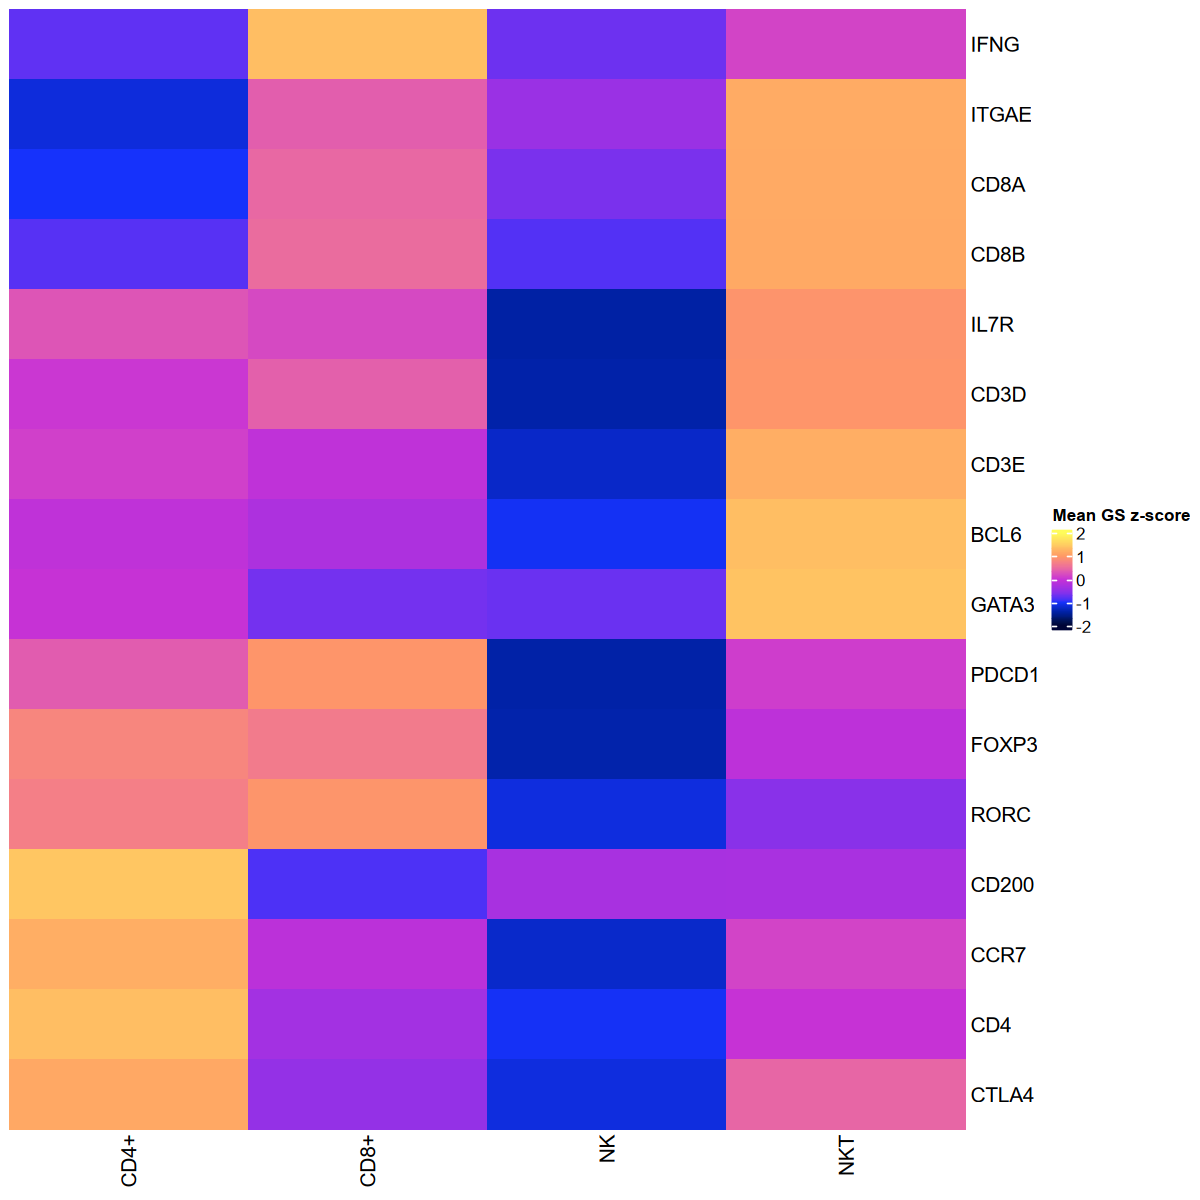

In [10]:
## 后续图 - 基于clusters
### marker gene基因活性
# Heatmap
## marker genes, 根据05_01_annotation中的显著表达来确定绘图的marker genes
markerGenes <- c(
    "CD3D", "CD3E", #T细胞标志marker
    "CD4", # CD4+标志marker
    "CD8A", "CD8B", # CD8+标志marker
    "CCR7", "IL7R", "ITGAE", "IFNG", # CD4+ CD8+ 共同亚群
    "FOXP3", "CTLA4",  "GATA3", "RORC","BCL6", # CD4+亚群
    "CD45RO", "PDCD1", "CD200" # CD8+亚群
)

## 绘制只有marker基因的热图，Mean GS z-score

### 提取差异基因中在marker genes中的基因
idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))
options(repr.plot.width = 10, repr.plot.height = 10)
ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
p3 <- draw(ht1)
p3

In [11]:
## T 差异peaks
markerPK <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "PeakMatrix", 
    groupBy = "clusters_harmony",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1f09f622d882a-Date-2025-03-17_Time-09-34-38.576106.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2025-03-17 09:34:39.169965 : Matching Known Biases, 0.009 mins elapsed.

###########
2025-03-17 09:36:44.602808 : Completed Pairwise Tests, 2.099 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-1f09f622d882a-Date-2025-03-17_Time-09-34-38.576106.log



In [12]:
saveRDS(markerPK, file = "./ArchRProject_T/markersPK_Tclusters.rds")

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-1f09f6214f66d9-Date-2025-03-17_Time-09-37-15.867481.log
If there is an issue, please report to github with logFile!



Identified 19532 markers!



  [1] "chr1:817109-817609"        "chr1:1005150-1005650"     
  [3] "chr1:1009092-1009592"      "chr1:1137211-1137711"     
  [5] "chr1:1143988-1144488"      "chr1:1165891-1166391"     
  [7] "chr1:1173595-1174095"      "chr1:1181787-1182287"     
  [9] "chr1:1212718-1213218"      "chr1:1213380-1213880"     
 [11] "chr1:1215049-1215549"      "chr1:1216371-1216871"     
 [13] "chr1:1219270-1219770"      "chr1:1221863-1222363"     
 [15] "chr1:1307360-1307860"      "chr1:8829458-8829958"     
 [17] "chr1:43974058-43974558"    "chr1:85258934-85259434"   
 [19] "chr1:154953619-154954119"  "chr1:155195286-155195786" 
 [21] "chr1:161176455-161176955"  "chr1:203311672-203312172" 
 [23] "chr10:43403732-43404232"   "chr10:119657540-119658040"
 [25] "chr11:6602920-6603420"     "chr11:66568382-66568882"  
 [27] "chr11:75574806-75575306"   "chr11:123034577-123035077"
 [29] "chr11:123046879-123047379" "chr11:123050918-123051418"
 [31] "chr1:6260877-6261377"      "chr1:7936660-7937160"     
 [33] "c

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-1f09f6214f66d9-Date-2025-03-17_Time-09-37-15.867481.log



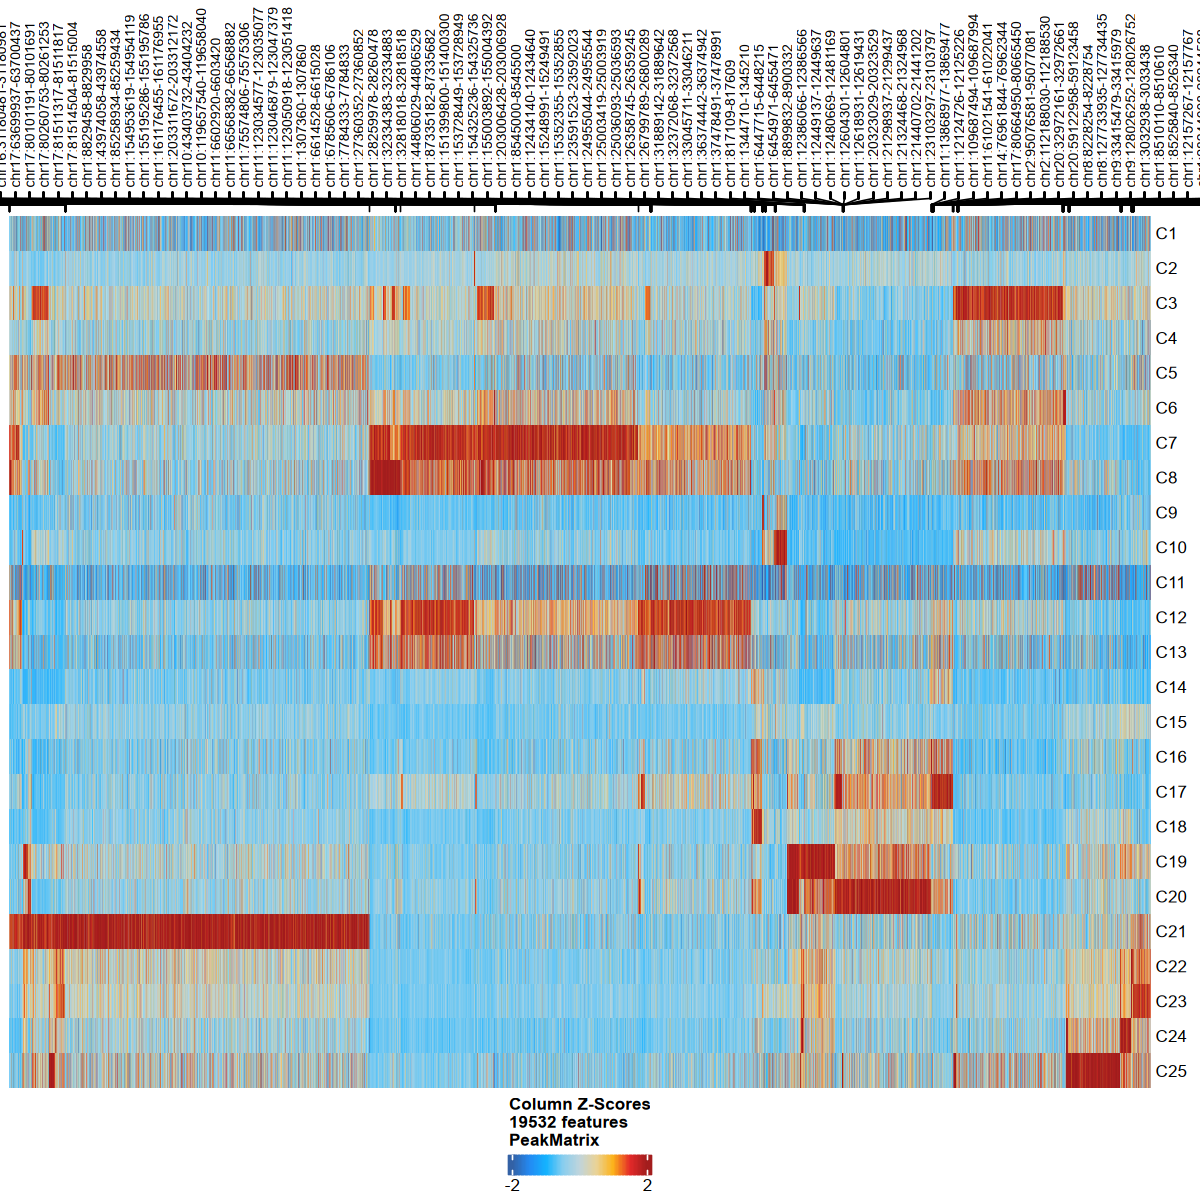

In [13]:
heatmapPeaks <- plotMarkerHeatmap(
    seMarker = markerPK,
    cutOff = "FDR <= 0.05 & Log2FC >= 1.25",
    transpose = TRUE
)
options(repr.plot.height = 10, repr.plot.width = 10)
ComplexHeatmap::draw(heatmapPeaks, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

DataFrame with 6 rows and 6 columns
    seqnames       idx              name combinedVars combinedMeans      rank
       <Rle> <integer>       <character>    <numeric>     <numeric> <integer>
f87        z        87 FOXA1.Forkhead_87      68.3331   -0.65523535         1
f86        z        86     Fosl2.bZIP_86      64.1998    0.00507140         2
f1         z         1       AP.1.bZIP_1      63.3041    0.02254696         3
f99        z        99      Fra2.bZIP_99      62.8903    0.00733377         4
f94        z        94 FOXM1.Forkhead_94      62.5174   -0.64134957         5
f88        z        88 FOXA1.Forkhead_88      61.6128   -0.63294138         6


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1f09f66d18d8da-Date-2025-03-17_Time-09-37-39.138247.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

2025-03-17 09:37:39.300163 : Matching Known Biases, 0.001 mins elapsed.



R_zmq_msg_send errno: 4 strerror: Interrupted system call


###########
2025-03-17 09:37:49.731269 : Completed Pairwise Tests, 0.175 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-1f09f66d18d8da-Date-2025-03-17_Time-09-37-39.138247.log

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


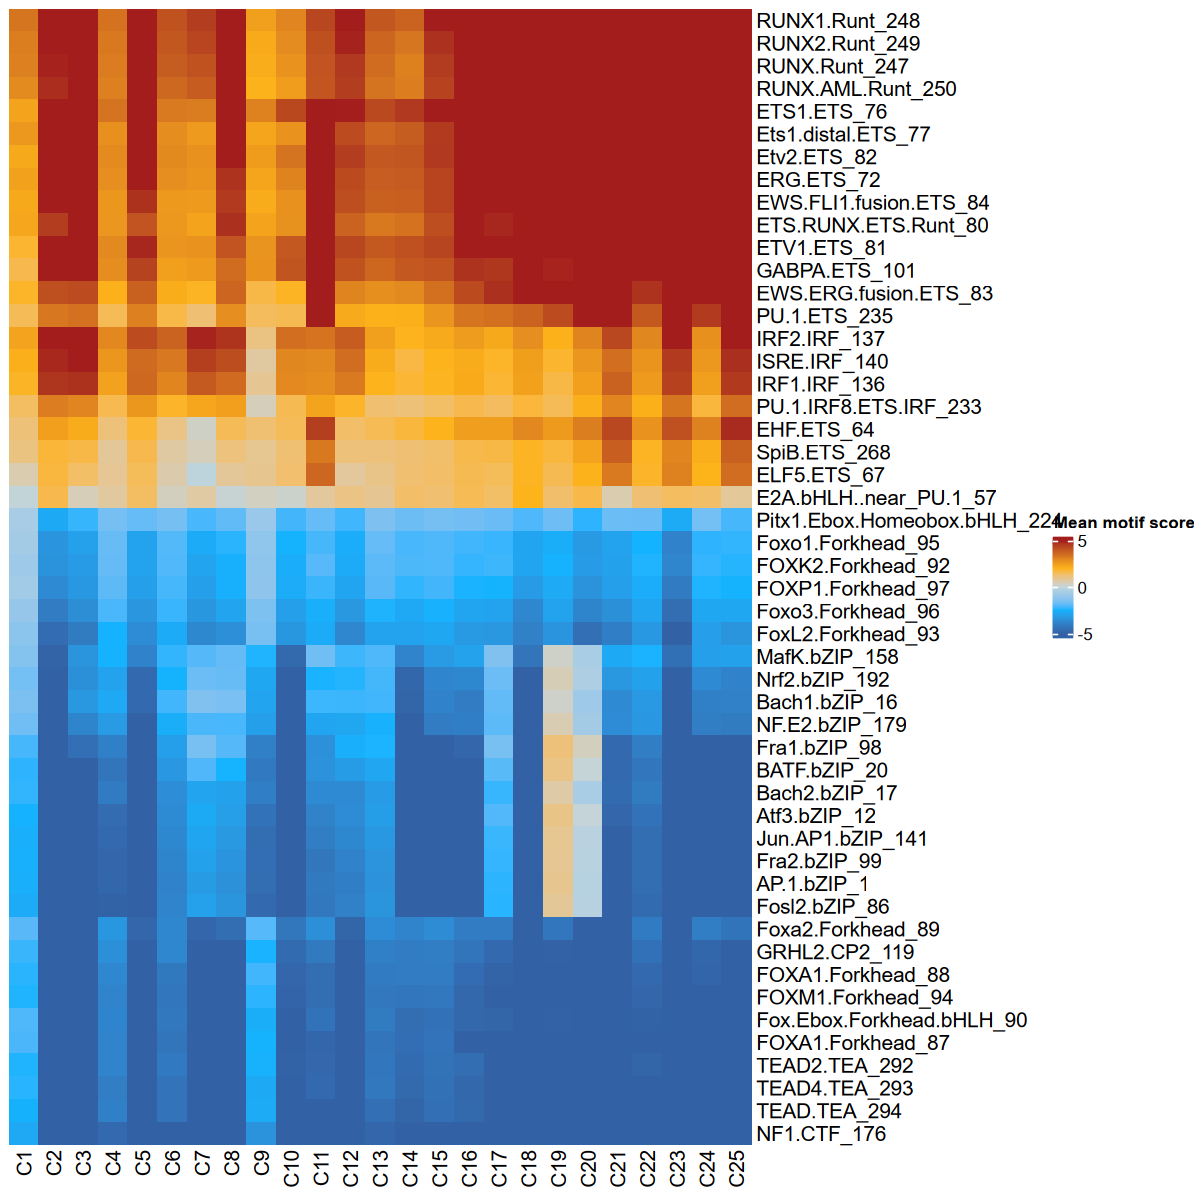

In [14]:
### motif enrichment
VarMotifs <- getVarDeviations(proj, name = "homerMatrix", plot = F)
MotifScoreClusters <- getMarkerFeatures(proj, 
                                        useMatrix = "homerMatrix", 
                                        groupBy = "clusters_harmony",
                                        bias = c("TSSEnrichment", "log10(nFrags)"),
                                        testMethod = "wilcoxon", 
                                        useSeqnames = "z")

fh <- function(x) hclust(dist(x), method="ward.D2")
idy <- which(mcols(MotifScoreClusters)$name %in% VarMotifs$name[c(1:50)])
mtx2 <- assays(MotifScoreClusters[idy,])$Mean %>% `rownames<-`(., mcols(MotifScoreClusters)$name[idy])

col_fun2 <- colorRamp2(c(-5,-2.5,0,2,5), paletteContinuous(set = "solarExtra", n = 5))
ht2 <- Heatmap(mtx2, name = "Mean motif score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun2)
options(repr.plot.width=10, repr.plot.height=10)
p6 <- draw(ht2)

In [ ]:
# 差异，motif分析
neoMotif <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "MotifMatrix",
    groupBy = "TCellType",
    useGroups = "without_neoadjuvant", # 前景组
    bgdGroups = "after_neoadjuvant", # 背景组
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-dc0d7df5c111-Date-2025-03-18_Time-05-52-39.672108.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'deviations'!
If confused, try getSeqnames(ArchRProj, 'MotifMatrix'') to list out available seqnames for input!

2025-03-18 05:52:39.969937 : 

2025-03-18 05:52:39.978824 : Matching Known Biases, 0.004 mins elapsed.



In [ ]:
neoMotifResult <- getMarkers(neoMotif, cutOff = "FDR <= 1")[[1]]
neoMotifResult <- as.data.frame(neoMotifResult)

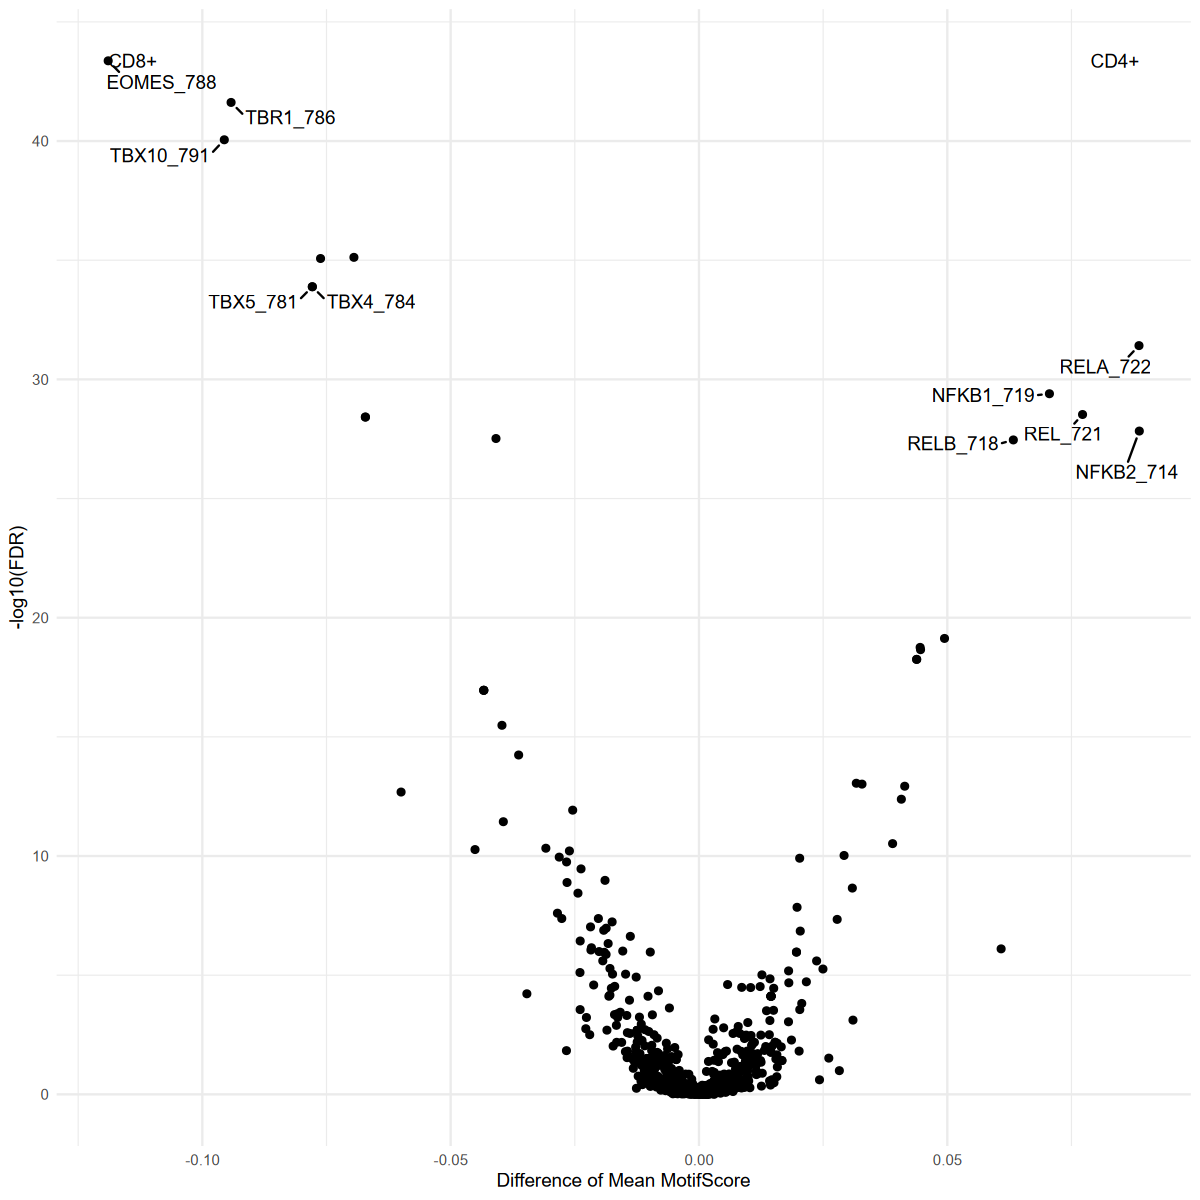

In [ ]:
# MeanDiff > 0 表示 without_neoadjuvant 组的得分高于 after_neoadjuvant 组（图中靠右）。
# MeanDiff < 0 表示 after_neoadjuvant 组的得分高于 without_neoadjuvant 组（图中靠左）。
# 基本火山图
p <- ggplot(neoMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 找出 MeanDiff 最大的五个点（正值，右侧）
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:5)

# 找出 MeanDiff 最小的五个点（负值，左侧）
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:5)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_positive, top5_negative)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0 # 强制显示所有连线 

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "after_neoadjuvant", hjust = 0) +
  annotate("text", x = max(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "without_neoadjuvant", hjust = 1)

# 显示图形
print(p)

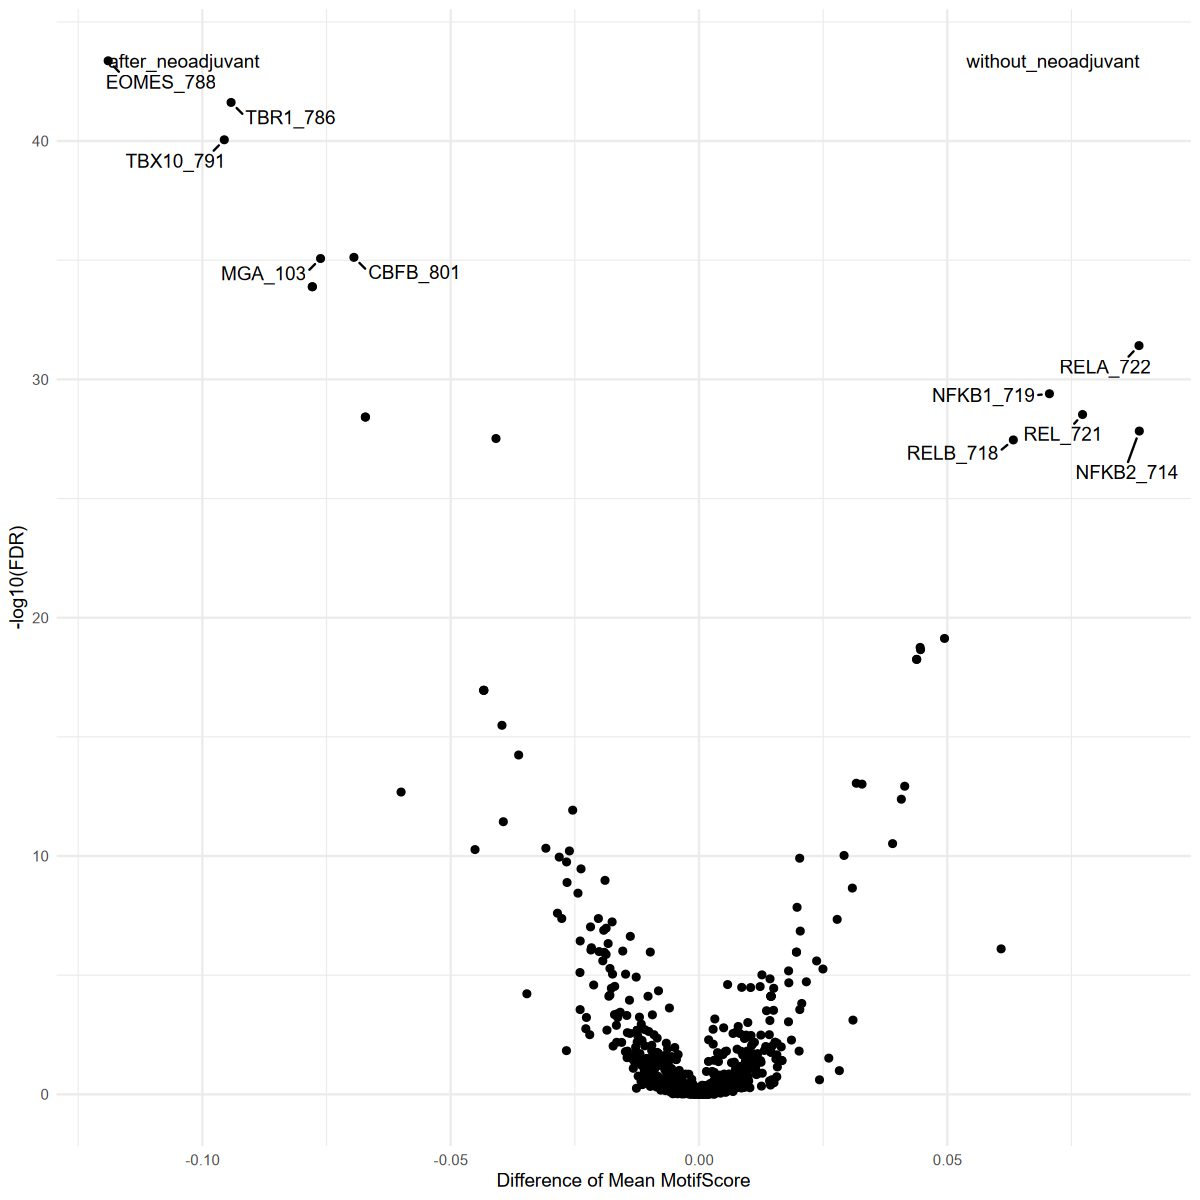

In [18]:
# 表达最显著的
# 基本火山图
p <- ggplot(neoMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 筛选 MeanDiff > 0 的点（without_neoadjuvant 组高表达），按 FDR 排序取前五
top5_without <- neoMotifResult %>% 
  filter(MeanDiff > 0) %>% 
  arrange(FDR) %>% 
  dplyr::slice(1:5)

# 筛选 MeanDiff < 0 的点（after_neoadjuvant 组高表达），按 FDR 排序取前五
top5_after <- neoMotifResult %>% 
  filter(MeanDiff < 0) %>% 
  arrange(FDR) %>% 
  dplyr::slice(1:5)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_without, top5_after)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0 # 强制显示所有连线 

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "after_neoadjuvant", hjust = 0) +
  annotate("text", x = max(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "without_neoadjuvant", hjust = 1)

# 显示图形
print(p)

In [ ]:
# 差异，motif分析
neoMotif <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "MotifMatrix",
    groupBy = "TCellType",
    useGroups = "without_neoadjuvant", # 前景组
    bgdGroups = "after_neoadjuvant", # 背景组
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1f09f62fa6c89-Date-2025-03-17_Time-09-44-13.740221.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'deviations'!
If confused, try getSeqnames(ArchRProj, 'MotifMatrix'') to list out available seqnames for input!

2025-03-17 09:44:13.981346 : 

2025-03-17 09:44:13.986782 : Matching Known Biases, 0.002 mins elapsed.



In [ ]:
# MeanDiff > 0 表示 without_neoadjuvant 组的得分高于 after_neoadjuvant 组（图中靠右）。
# MeanDiff < 0 表示 after_neoadjuvant 组的得分高于 without_neoadjuvant 组（图中靠左）。
# 基本火山图
p <- ggplot(neoMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 找出 MeanDiff 最大的五个点（正值，右侧）
top5_positive <- neoMotifResult %>% 
  arrange(desc(MeanDiff)) %>% 
  dplyr::slice(1:5)

# 找出 MeanDiff 最小的五个点（负值，左侧）
top5_negative <- neoMotifResult %>% 
  arrange(MeanDiff) %>% 
  dplyr::slice(1:5)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_positive, top5_negative)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0 # 强制显示所有连线 

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "CD8+", hjust = 0) +
  annotate("text", x = max(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "CD4+", hjust = 1)

# 显示图形
print(p)

In [ ]:
# 表达最显著的
# 基本火山图
p <- ggplot(neoMotifResult, aes(x = MeanDiff, y = -log10(FDR))) +
  geom_point() +
  labs(x = "Difference of Mean MotifScore",
       y = "-log10(FDR)") +
  theme_minimal()

# 筛选 MeanDiff > 0 的点（without_neoadjuvant 组高表达），按 FDR 排序取前五
top5_without <- neoMotifResult %>% 
  filter(MeanDiff > 0) %>% 
  arrange(FDR) %>% 
  dplyr::slice(1:5)

# 筛选 MeanDiff < 0 的点（after_neoadjuvant 组高表达），按 FDR 排序取前五
top5_after <- neoMotifResult %>% 
  filter(MeanDiff < 0) %>% 
  arrange(FDR) %>% 
  dplyr::slice(1:5)

# 合并为包含十个点的 top10 数据框
top10 <- bind_rows(top5_without, top5_after)

# 为 top10 中的点添加标签
p <- p + geom_text_repel(
      data = top10, aes(label = name), 
      vjust = -1,
      force = 4, # 增大注释与点之间的距离
      box.padding = 0.5, # 注释框与点的最小间距
      point.padding = 0.5, # 点与连接线的间距
      min.segment.length = 0 # 强制显示所有连线 

  )

# 添加组别注释
p <- p +
  annotate("text", x = min(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "after_neoadjuvant", hjust = 0) +
  annotate("text", x = max(neoMotifResult$MeanDiff), y = max(-log10(neoMotifResult$FDR)),
           label = "without_neoadjuvant", hjust = 1)

# 显示图形
print(p)